In [1]:
import pandas as pd
from pathlib import Path
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#
import matplotlib.pyplot as plt

In [6]:
def read_data(path):
    num_contact= pd.read_csv(Path(path).joinpath("avrContNum_042020-042021.csv"), sep=";", parse_dates=["date"], dayfirst=True)
    behavior= pd.read_csv(Path(path).joinpath("wBehavioralDynamics_mask_abroad_travel_inf.csv"), sep=";", parse_dates=["date"], dayfirst=True)
    contact_dyn= pd.read_csv(Path(path).joinpath("wContactDyn_allfam_BP_CentrHU_RuralHU.csv"), sep=";", parse_dates=["date"], dayfirst=True)
    return num_contact, behavior, contact_dyn

In [7]:
num_contact, behavior, contact_dyn= read_data("./data")

In [8]:
behavior.isnull().any()

date                          False
epoch                         False
fraction_mask                 False
fraction_travel_abroad        False
fraction_travel_settlement    False
infectednum                   False
dtype: bool

In [9]:
num_contact.isnull().any()

date         False
obs_start    False
obs_end      False
cn_avr       False
cn_var       False
dtype: bool

In [10]:
contact_dyn.isnull().any()

epoch                   False
date                    False
all_contact             False
all_contact_var         False
capital_cont            False
capital_cont_var        False
central_hun_cont        False
central_hun_cont_var    False
rural_hun_cont          False
rural_hun_cont_var      False
dtype: bool

In [11]:
num_contact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       12 non-null     datetime64[ns]
 1   obs_start  12 non-null     object        
 2   obs_end    12 non-null     object        
 3   cn_avr     12 non-null     float64       
 4   cn_var     12 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 608.0+ bytes


In [12]:
behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        417 non-null    datetime64[ns]
 1   epoch                       417 non-null    int64         
 2   fraction_mask               417 non-null    float64       
 3   fraction_travel_abroad      417 non-null    float64       
 4   fraction_travel_settlement  417 non-null    float64       
 5   infectednum                 417 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 19.7 KB


In [13]:
contact_dyn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   epoch                 417 non-null    int64         
 1   date                  417 non-null    datetime64[ns]
 2   all_contact           417 non-null    float64       
 3   all_contact_var       417 non-null    float64       
 4   capital_cont          417 non-null    float64       
 5   capital_cont_var      417 non-null    float64       
 6   central_hun_cont      417 non-null    float64       
 7   central_hun_cont_var  417 non-null    float64       
 8   rural_hun_cont        417 non-null    float64       
 9   rural_hun_cont_var    417 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 32.7 KB


<AxesSubplot:xlabel='date'>

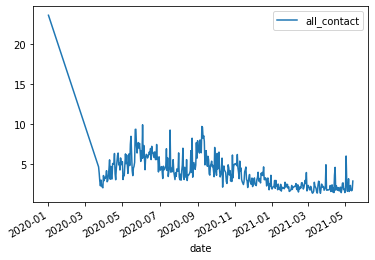

In [14]:
contact_dyn.plot(x="date", y="all_contact")

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

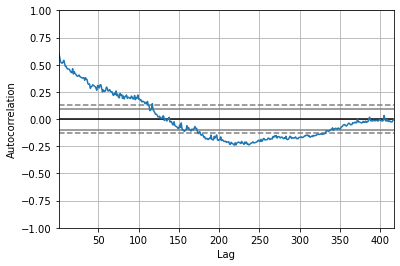

In [27]:
autocorrelation_plot(contact_dyn.all_contact)

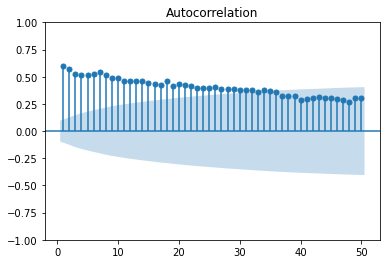

In [28]:
_=plot_acf(contact_dyn.all_contact, lags=50, zero=False)

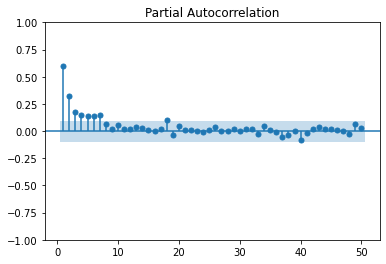

In [29]:
_= plot_pacf(contact_dyn.all_contact, lags=50, zero=False, method="ywm")

In [30]:
def cross_correlation(scr_series:pd.Series, dest_series:pd.Series, lags=365):
    xcross= {i: scr_series.corr(dest_series.shift(i)) for i in range(lags)}
    return pd.DataFrame.from_dict(data=xcross, columns=["xcross"], orient="index")

Text(0, 0.5, 'Xcross')

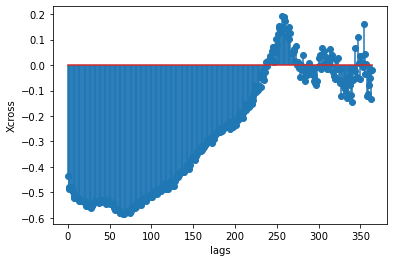

In [35]:
xcross= cross_correlation(contact_dyn.all_contact, behavior.infectednum)
plt.stem(xcross.xcross)
plt.xlabel("lags")
plt.ylabel("Xcross")

Text(0, 0.5, 'xcross')

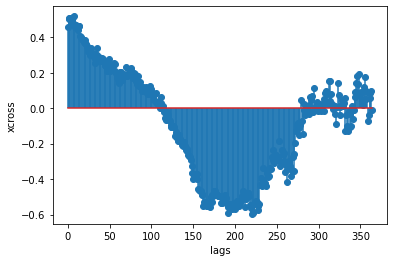

In [36]:
xcross= cross_correlation(contact_dyn.all_contact, behavior.fraction_travel_settlement)
plt.stem(xcross.xcross)
plt.xlabel("lags")
plt.ylabel("xcross")

Text(0, 0.5, 'xcross')

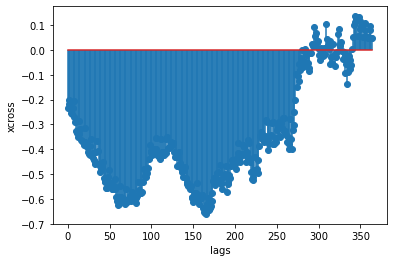

In [38]:
xcross= cross_correlation(contact_dyn.all_contact, behavior.fraction_mask)
plt.stem(xcross.xcross)
plt.xlabel("lags")
plt.ylabel("xcross")

Text(0, 0.5, 'avg_num_contacts')

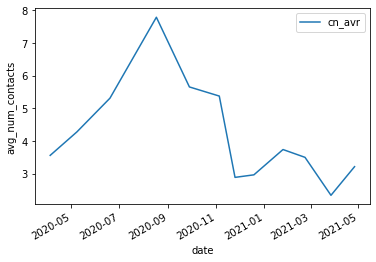

In [39]:
num_contact.plot(x="date", y="cn_avr")
plt.ylabel("avg_num_contacts")